            Estados Ocultos  Probabilidad  Probabilidad Acumulada
0  [B, B, B, B, J, J, J, J]      9.878991                9.878991
1  [J, J, J, J, J, J, J, J]      8.469643               18.348634


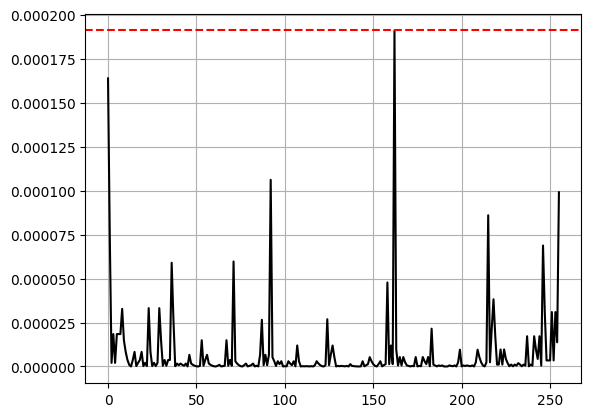


            Estado Observable  Probabilidad  Probabilidad Acumulada
0    [C, C, C, C, C, C, C, C]      0.136982                0.136982
1    [C, C, C, C, C, C, C, S]      0.041149                0.178132
2    [C, C, C, C, C, C, S, C]      0.034737                0.212869
3    [C, C, C, C, C, S, C, C]      0.031753                0.244622
4    [C, C, C, C, S, C, C, C]      0.030268                0.274889
..                        ...           ...                     ...
251  [S, S, C, S, S, S, S, S]      0.000283                0.998944
252  [S, S, S, S, S, C, S, S]      0.000274                0.999218
253  [S, S, S, C, S, S, S, S]      0.000273                0.999491
254  [S, S, S, S, C, S, S, S]      0.000272                0.999764
255  [S, S, S, S, S, S, S, S]      0.000236                1.000000

[256 rows x 3 columns]

Dado el estado observable ['S', 'C', 'C', 'C', 'S', 'C', 'S', 'C'] este tiene una probabilidad del 0.19344381513984013% de ocurrir.
La secuencia no observable

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from itertools import permutations, combinations_with_replacement

Dict = {0: 'C', 1: 'S'}
Dict2 = {0: 'J', 1: 'B'}
possible_states = np.array([0, 1])
prior = np.array([0.2, 0.8])

def get_permutations(State, N):
    comb_list = list(combinations_with_replacement(State, N))
    permu_list = []
    for comb in comb_list:
        for i in list(permutations(comb, N)):
            if i not in permu_list:
                permu_list.append(i)
    permu_list = np.array(permu_list)
    return permu_list

possible_hidden_states = get_permutations(possible_states, 8)
T = np.array([[0.8, 0.2], [0.2, 0.8]])
E = np.array([[0.5, 0.9], [0.5, 0.1]])
Obs = [1, 0, 0, 0, 1, 0, 1, 0]

def GetProb(transmission, emission, observed, state, prior):
    n = len(observed)
    probability = prior[state[0]]
    for i in range(n - 1):
        probability *= transmission[state[i + 1], state[i]]
    for i in range(n):
        probability *= emission[observed[i], state[i]]
    return probability

def get_prob_state(hidden, transmission, emission, observed, prior):
    probabilities = np.zeros(possible_hidden_states.shape[0])
    for i in range(probabilities.shape[0]):
        probabilities[i] = GetProb(transmission, emission, observed, hidden[i], prior)
        
    max_i = np.where(probabilities == np.max(probabilities))
    return probabilities, max_i

df = pd.DataFrame({"Estados Ocultos":[[Dict2[i] for i in state] for state in possible_hidden_states], "Probabilidad": [GetProb(T,E,Obs,state,prior) for state in possible_hidden_states]})
total_prob = df["Probabilidad"].sum()
df["Probabilidad"] = df["Probabilidad"] * 100
df["Probabilidad"] = df["Probabilidad"] / total_prob  
df_sorted = df.sort_values(by="Probabilidad", ascending=False).reset_index(drop=True)
df_sorted["Probabilidad Acumulada"] = df_sorted["Probabilidad"].cumsum()
df_subset = df_sorted[df_sorted["Probabilidad Acumulada"] <= 20]

print(df_subset)

possible_obs, max_prob = get_prob_state(possible_hidden_states, T, E, Obs, prior)
max_obs = [Dict2[int(i)] for i in possible_hidden_states[max_prob][0]]
obs_stat = [Dict[int(i)] for i in Obs]
max_prob0 = possible_obs[max_prob][0].copy()

plt.plot(possible_obs, color="black")
plt.axhline(max_prob0, color="red", linestyle="--")
plt.grid(True)
plt.show()

possible_observable_states = possible_hidden_states.copy()
df2 = pd.DataFrame({"Estado Observable":[[Dict[i] for i in state] for state in possible_observable_states], "Probabilidad": [np.sum(get_prob_state(possible_hidden_states,T,E,observation,prior)[0]) for observation in possible_observable_states]})
df2_sorted = df2.sort_values(by="Probabilidad", ascending=False).reset_index(drop=True)
df2_sorted["Probabilidad Acumulada"] = df2_sorted["Probabilidad"].cumsum()
print("")
print(df2_sorted)

pt = 0

for observation in possible_observable_states:
    possible, max_prob = get_prob_state(possible_hidden_states, T, E, observation, prior)
    pt += np.sum(possible)

print("\nDado el estado observable", obs_stat, "este tiene una probabilidad del", str(np.sum(possible_obs) * 100) + "% de ocurrir.")
print("La secuencia no observable más probable que puede ocurrir es:", max_obs, "\nCon una probabilidad del:", str(max_prob0/total_prob * 100) + "%.")
print("\nLa suma de las posibilidades de todos los estados observables es:", pt)